In [1]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler
from sklearn import decomposition
from sklearn.preprocessing import OneHotEncoder


from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation
from tensorflow.keras.optimizers import SGD, Adam

# FONT 깨질때 폰트깨질때
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname = "C:/Windows/Fonts/malgun.ttf").get_name()
rc('font',family=font_name)

In [48]:
df = pd.read_excel('./최종 데이터 그래프그리기용.xlsx') 
print(df)

      Sample_ID GROUP  COHORT SEX  AGE     Trait FitbitOX      Fitbit_ID  HTN  \
0         S0001   SMI       2   M   60  fitbit_O        O  sevrance00001  NaN   
1         S0002   SMI       2   M   61  fitbit_O        O  sevrance00002  NaN   
2         S0003   SMI       2   F   52  fitbit_O        O  sevrance00003  NaN   
3         S0004   SMI       2   F   41  fitbit_O        O  sevrance00004  NaN   
4         S0005   SMI       2   F   41  fitbit_O        O  sevrance00005  NaN   
..          ...   ...     ...  ..  ...       ...      ...            ...  ...   
383  MetS_S0280  MetS       1   F   24  fitbit_O        O   gnfmmets+139  NaN   
384  MetS_S0281  MetS       1   F   44  fitbit_O        O   gnfmmets+140  NaN   
385  MetS_S0282  MetS       1   F   37  fitbit_O        O   gnfmmets+141  1.0   
386  MetS_S0283  MetS       1   M   51  fitbit_X        X              X  NaN   
387  MetS_S0284  MetS       1   F   42  fitbit_X        X              X  NaN   

      DM  ...  BDI_Q13_2 BD

In [49]:
psqi_df=df[['Sample_ID','GROUP','COHORT','AGE','SEX','BMI_1','PSQI_TOTAL_1','Insulin _1','CRP_1','WBC_1','Neutrophil_1','Lym_1','GLU0_1','Creatinine_1','AST_1','ALT_1','TG_1','LDL_1','Muscle_1','Fat_1_x','FatPercentage _1','WHR_1','SBP_1',
            'DBP_1','HR_1','Waist_1','Chol_1','BUN_1','HDL_1',
          'BMI_2','PSQI_TOTAL_2','Insulin _2','CRP_2','WBC_2','Neutrophil_2','Lym_2','GLU0_2',
            'Creatinine_2','AST_2','ALT_2','TG_2','LDL_2','Muscle_2','Fat_2_x','FatPercentage_2','WHR_2','SBP_2',
            'DBP_2','HR_2','Waist_2','Chol_2','BUN_2','HDL_2']]

In [50]:
psqi_df

,Sample_ID,GROUP,COHORT,AGE,SEX,BMI_1,PSQI_TOTAL_1,Insulin _1,CRP_1,WBC_1,...,Fat_2_x,FatPercentage_2,WHR_2,SBP_2,DBP_2,HR_2,Waist_2,Chol_2,BUN_2,HDL_2
0,S0001,SMI,2,60,M,21.110190,8.0,7.7,0.2,3.91,...,9.7,15.9,0.89,108.0,78.0,87.0,83.0,NaN,13.1,77.0
1,S0002,SMI,2,61,M,27.782064,4.0,5.4,0.2,5.51,...,19.9,27.9,0.99,138.0,92.0,73.0,90.5,NaN,19.2,59.0
2,S0003,SMI,2,52,F,24.944742,3.0,5.1,0.7,4.85,...,22.6,36.7,0.89,127.0,80.0,66.0,86.5,NaN,17.1,40.0
3,S0004,SMI,2,41,F,22.620489,6.0,4.2,0.6,6.14,...,16.0,30.9,0.82,119.0,83.0,77.0,77.0,NaN,12.2,54.0
4,S0005,SMI,2,41,F,20.524157,10.0,3.2,0.1,4.93,...,14.9,26.8,0.80,110.0,68.0,67.0,66.5,NaN,16.5,72.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
383,MetS_S0280,MetS,1,24,F,34.803410,5.0,11.3,0.4,5.32,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
384,MetS_S0281,MetS,1,44,F,30.903615,3.0,10.6,2.3,5.82,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
385,MetS_S0282,MetS,1,37,F,28.676533,3.0,12.2,1,6.18,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
386,MetS_S0283,MetS,1,51,M,24.549738,5.0,10.4,1.2,6.67,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [51]:
#보조 호르몬 요법을 받고 있는 Cohort 3 제거 Filter 적용
psqi_df = psqi_df[(psqi_df['COHORT'] != 3)]
psqi_df

,Sample_ID,GROUP,COHORT,AGE,SEX,BMI_1,PSQI_TOTAL_1,Insulin _1,CRP_1,WBC_1,...,Fat_2_x,FatPercentage_2,WHR_2,SBP_2,DBP_2,HR_2,Waist_2,Chol_2,BUN_2,HDL_2
0,S0001,SMI,2,60,M,21.110190,8.0,7.7,0.2,3.91,...,9.7,15.9,0.89,108.0,78.0,87.0,83.0,NaN,13.1,77.0
1,S0002,SMI,2,61,M,27.782064,4.0,5.4,0.2,5.51,...,19.9,27.9,0.99,138.0,92.0,73.0,90.5,NaN,19.2,59.0
2,S0003,SMI,2,52,F,24.944742,3.0,5.1,0.7,4.85,...,22.6,36.7,0.89,127.0,80.0,66.0,86.5,NaN,17.1,40.0
3,S0004,SMI,2,41,F,22.620489,6.0,4.2,0.6,6.14,...,16.0,30.9,0.82,119.0,83.0,77.0,77.0,NaN,12.2,54.0
4,S0005,SMI,2,41,F,20.524157,10.0,3.2,0.1,4.93,...,14.9,26.8,0.80,110.0,68.0,67.0,66.5,NaN,16.5,72.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
383,MetS_S0280,MetS,1,24,F,34.803410,5.0,11.3,0.4,5.32,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
384,MetS_S0281,MetS,1,44,F,30.903615,3.0,10.6,2.3,5.82,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
385,MetS_S0282,MetS,1,37,F,28.676533,3.0,12.2,1,6.18,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
386,MetS_S0283,MetS,1,51,M,24.549738,5.0,10.4,1.2,6.67,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [52]:
psqi_df=psqi_df.dropna()
psqi_df.reset_index(drop=True, inplace=True)
psqi_df=psqi_df.drop(["Sample_ID", "GROUP", "COHORT"],axis=1)
#1분, 매일다름, 정해진간이없음 삭제

In [53]:
psqi_df["SEX"] = psqi_df["SEX"].apply(lambda x: 1. if x=='M' else 0.)

In [54]:
psqi_df["Insulin _1"] = psqi_df["Insulin _1"].apply(lambda x: 0.1 if x=='<0.2' else 0. if x=='<0.1' else x)
psqi_df["Insulin _2"] = psqi_df["Insulin _2"].apply(lambda x: 0.1 if x=='<0.2' else 0. if x=='<0.1' else x)

In [55]:
psqi_df["CRP_1"] = psqi_df["CRP_1"].apply(lambda x: 0.1 if x=='<0.2' else 0. if x=='<0.1' else x)
psqi_df["CRP_2"] = psqi_df["CRP_2"].apply(lambda x: 0.1 if x=='<0.2' else 0. if x=='<0.1' else x)

In [56]:
psqi_df.describe()

,AGE,SEX,BMI_1,PSQI_TOTAL_1,Insulin _1,CRP_1,WBC_1,Neutrophil_1,Lym_1,GLU0_1,...,Fat_2_x,FatPercentage_2,WHR_2,SBP_2,DBP_2,HR_2,Waist_2,Chol_2,BUN_2,HDL_2
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.00000,...,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.00000
mean,38.366667,0.305556,23.799644,5.105556,7.700000,0.748889,5.844867,56.086111,34.113333,98.90000,...,19.053333,28.888333,0.862444,114.605556,72.477778,75.644444,81.328889,190.922222,12.984444,59.20000
std,11.589776,0.461927,4.936177,2.893833,4.105985,1.344157,1.412280,8.502880,7.708889,14.43773,...,6.616151,7.098802,0.071696,13.213544,9.091991,10.306814,10.251265,32.017358,3.508550,14.01372
min,20.000000,0.000000,15.231576,0.000000,0.100000,0.000000,2.820000,34.500000,15.100000,63.00000,...,7.700000,11.500000,0.700000,91.000000,57.000000,54.000000,61.000000,109.000000,6.000000,29.00000
25%,29.000000,0.000000,20.833309,3.000000,5.000000,0.200000,4.857500,50.525000,28.975000,92.00000,...,14.200000,24.275000,0.820000,104.000000,67.000000,68.000000,73.875000,167.750000,10.675000,49.00000
50%,35.500000,0.000000,23.422889,5.000000,6.500000,0.300000,5.720000,55.950000,34.000000,95.50000,...,17.950000,28.450000,0.850000,114.000000,71.000000,75.000000,80.500000,188.000000,12.700000,57.00000
75%,46.000000,1.000000,25.502662,7.000000,9.505000,0.700000,6.580000,62.000000,39.000000,102.00000,...,22.125000,33.450000,0.900000,123.000000,77.250000,82.000000,89.000000,211.000000,14.600000,69.00000
max,63.000000,1.000000,67.500000,14.000000,24.700000,11.100000,10.550000,78.400000,55.400000,182.00000,...,46.100000,48.300000,1.070000,158.000000,107.000000,112.000000,118.000000,296.000000,36.400000,116.00000


In [57]:
psqi_df["SEX"].value_counts()

0.0    125
1.0     55
Name: SEX, dtype: int64

In [58]:
psqi_df

,AGE,SEX,BMI_1,PSQI_TOTAL_1,Insulin _1,CRP_1,WBC_1,Neutrophil_1,Lym_1,GLU0_1,...,Fat_2_x,FatPercentage_2,WHR_2,SBP_2,DBP_2,HR_2,Waist_2,Chol_2,BUN_2,HDL_2
0,35,1.0,24.097789,5.0,5.57,0.0,5.82,54.6,35.0,89,...,20.4,26.8,1.00,131.0,74.0,66.0,88.5,180.0,17.5,53.0
1,46,1.0,23.472213,5.0,7.35,0.7,5.46,44.3,43.7,90,...,14.5,18.6,0.84,126.0,87.0,108.0,85.0,203.0,14.4,64.0
2,32,1.0,23.744827,2.0,9.26,0.4,3.99,51.0,37.8,96,...,17.8,25.6,0.89,131.0,77.0,87.0,81.0,196.0,14.1,49.0
3,33,0.0,20.616175,4.0,3.52,0.0,5.84,39.1,42.1,81,...,12.8,21.9,0.78,102.0,62.0,70.0,69.0,224.0,10.5,98.0
4,28,0.0,18.437500,3.0,2.86,0.0,4.22,49.3,39.3,63,...,12.3,25.6,0.80,106.0,72.0,69.0,61.0,168.0,11.3,71.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,63,0.0,26.259585,3.0,4.20,0.2,4.78,42.3,47.3,96,...,27.3,39.3,0.94,134.0,89.0,81.0,98.0,141.0,17.1,66.0
176,57,1.0,28.630719,4.0,8.80,3.0,4.60,51.7,34.6,94,...,22.1,25.7,0.95,113.0,76.0,66.0,97.5,134.0,14.6,51.0
177,35,0.0,21.641274,1.0,6.30,0.4,6.34,55.9,34.9,87,...,17.5,29.9,0.84,107.0,72.0,64.0,80.5,147.0,9.7,49.0
178,61,0.0,20.421366,8.0,4.80,0.2,4.88,40.9,48.0,93,...,15.3,29.0,0.81,106.0,76.0,92.0,79.0,134.0,10.2,60.0


In [59]:
#x 배열 생성 (x=AGE, SEX, PSQI, BMI)
X1=psqi_df[['AGE','SEX','BMI_1','PSQI_TOTAL_1','Insulin _1','CRP_1','WBC_1','Neutrophil_1','Lym_1','GLU0_1',
            'Creatinine_1','AST_1','ALT_1','TG_1','LDL_1','Muscle_1','Fat_1_x','FatPercentage _1','WHR_1','SBP_1',
            'DBP_1','HR_1','Waist_1','Chol_1','BUN_1']]

X2=psqi_df[['AGE','SEX','BMI_2','PSQI_TOTAL_2','Insulin _2','CRP_2','WBC_2','Neutrophil_2','Lym_2','GLU0_2',
            'Creatinine_2','AST_2','ALT_2','TG_2','LDL_2','Muscle_2','Fat_2_x','FatPercentage_2','WHR_2','SBP_2',
            'DBP_2','HR_2','Waist_2','Chol_2','BUN_2']]
X_all=np.concatenate((X1, X2), axis=0)

#x 배열 생성 (선별)
X1=psqi_df[['SEX','AGE','PSQI_TOTAL_1','BMI_1','WBC_1','GLU0_1','ALT_1','TG_1','LDL_1',
            'Muscle_1','Fat_1_x','SBP_1','DBP_1','HR_1','Waist_1','PSQI_TOTAL_1']].values
X2=psqi_df[['SEX','AGE','PSQI_TOTAL_2','BMI_2','WBC_2','GLU0_2','ALT_2','TG_2','LDL_2',
            'Muscle_2','Fat_2_x','SBP_2','DBP_2','HR_2','Waist_2','PSQI_TOTAL_2']].values
X_some=np.concatenate((X1, X2), axis=0)

#y 배열 생성 (y=HDL)
Y1= psqi_df[['HDL_1']].values
Y2= psqi_df[['HDL_2']].values
Y=np.concatenate((Y1, Y2), axis=0)

In [60]:
len(X_all), len(X_some), len(Y)

(360, 360, 360)

In [61]:
X_all.shape, X_some.shape, Y.shape

((360, 25), (360, 16), (360, 1))

# 정규화

In [62]:
#정규화 (변수간의 스케일 차이)
X_all = StandardScaler().fit_transform(X_all)
X_some = StandardScaler().fit_transform(X_some)

In [85]:
X_all=np.asarray(X_all).astype(np.float)
X_some=np.asarray(X_some).astype(np.float)
Y=np.asarray(Y).astype(np.float)

x_train_all,x_test_all,y_train_all,y_test_all=train_test_split(X_all,Y,train_size=0.8, random_state=100)
x_train_some,x_test_some,y_train_some,y_test_some=train_test_split(X_some,Y,train_size=0.8, random_state=100)

In [86]:
len(x_train_all), len(x_test_all)

(288, 72)

In [87]:
len(x_train_some), len(x_test_some)

(288, 72)

In [88]:
dim_1=X_all.shape[1]
dim_2=X_some.shape[1]
dim_1, dim_2

(25, 16)

# MLP - ALL

In [93]:
#define model
model_all=Sequential()
model_all.add(Dense(32, activation='relu', input_dim=dim_1))
model_all.add(Dense(32, activation='relu'))
model_all.add(Dense(1, activation='relu'))

model_all.compile(loss='mse',optimizer='rmsprop',metrics=['mse'])

#fit model
history_all=model_all.fit(x_train_all, y_train_all, epochs=150, batch_size=4, verbose=2)
model_all.evaluate(x_test_all, y_test_all) 

Epoch 1/150
72/72 - 0s - loss: 3451.5381 - mse: 3451.5381
Epoch 2/150
72/72 - 0s - loss: 2750.6260 - mse: 2750.6260
Epoch 3/150
72/72 - 0s - loss: 1700.9032 - mse: 1700.9032
Epoch 4/150
72/72 - 0s - loss: 674.3023 - mse: 674.3023
Epoch 5/150
72/72 - 0s - loss: 293.7862 - mse: 293.7862
Epoch 6/150
72/72 - 0s - loss: 236.5044 - mse: 236.5044
Epoch 7/150
72/72 - 0s - loss: 206.9991 - mse: 206.9991
Epoch 8/150
72/72 - 0s - loss: 183.4375 - mse: 183.4375
Epoch 9/150
72/72 - 0s - loss: 166.1641 - mse: 166.1641
Epoch 10/150
72/72 - 0s - loss: 151.3691 - mse: 151.3691
Epoch 11/150
72/72 - 0s - loss: 139.3979 - mse: 139.3979
Epoch 12/150
72/72 - 0s - loss: 128.4589 - mse: 128.4589
Epoch 13/150
72/72 - 0s - loss: 117.2155 - mse: 117.2155
Epoch 14/150
72/72 - 0s - loss: 110.5089 - mse: 110.5089
Epoch 15/150
72/72 - 0s - loss: 103.1648 - mse: 103.1648
Epoch 16/150
72/72 - 0s - loss: 95.4880 - mse: 95.4880
Epoch 17/150
72/72 - 0s - loss: 89.8663 - mse: 89.8663
Epoch 18/150
72/72 - 0s - loss: 82.524

[103.86009979248047, 103.86009979248047]

In [94]:
model_all.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 32)                832       
_________________________________________________________________
dense_7 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 33        
Total params: 1,921
Trainable params: 1,921
Non-trainable params: 0
_________________________________________________________________


<AxesSubplot:>

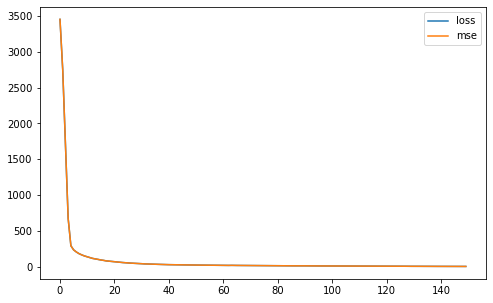

In [95]:
pd.DataFrame(history_all.history).plot(figsize=(8,5))

In [96]:
y_train_p_all = model_all.predict(x_train_all)
y_test_p_all = model_all.predict(x_test_all)

for t,p in zip(y_train,y_train_p):
    print(t,p)

for t,p in zip(y_test,y_test_p):
    print(t,p)

In [97]:
y_train_list_all=np.array(y_train_all).flatten().tolist() #y_train_all 리스트
y_test_list_all=np.array(y_test_all).flatten().tolist() #y_test_all 리스트
y_p_train_list_all=np.array(y_train_p_all).flatten().tolist() #y_train_all 예측 리스트
y_p_test_list_all=np.array(y_test_p_all).flatten().tolist() #y_test_all 예측 리스트

#오차 범위 3 설정
scores = 0
for i in range(len(y_train)):
    if  y_train_list[i]-3 <= y_p_train_list[i] <= y_train_list[i]+3:
        scores+=1

accuracy=scores/len(y_train)
print("- train set prediction accuracy(+-3): {:.2f} %".format(accuracy*100)) # 예측 정확도


scores = 0
for i in range(len(y_test)):
    if  y_test_list[i]-3 <= y_p_test_list[i] <= y_test_list[i]+3:
        scores+=1

accuracy=scores/len(y_test)
print("- test set prediction accuracy(+-3): {:.2f} %".format(accuracy*100)) # 예측 정확도

#======================================================================================


#오차 범위 5 설정
scores = 0
for i in range(len(y_train)):
    if  y_train_list[i]-5 <= y_p_train_list[i] <= y_train_list[i]+5:
        scores+=1

accuracy=scores/len(y_train)
print("- train set prediction accuracy(+-5): {:.2f} %".format(accuracy*100)) # 예측 정확도


scores = 0
for i in range(len(y_test)):
    if  y_test_list[i]-5 <= y_p_test_list[i] <= y_test_list[i]+5:
        scores+=1

accuracy=scores/len(y_test)
print("- test set prediction accuracy(+-5): {:.2f} %".format(accuracy*100)) # 예측 정확도

#======================================================================================


#오차 범위 10 설정
scores = 0
for i in range(len(y_train)):
    if  y_train_list[i]-10 <= y_p_train_list[i] <= y_train_list[i]+10:
        scores+=1

accuracy=scores/len(y_train)
print("- train set prediction accuracy(+-10): {:.2f} %".format(accuracy*100)) # 예측 정확도


scores = 0
for i in range(len(y_test)):
    if  y_test_list[i]-10 <= y_p_test_list[i] <= y_test_list[i]+10:
        scores+=1

accuracy=scores/len(y_test)
print("- test set prediction accuracy(+-10): {:.2f} %".format(accuracy*100)) # 예측 정확도


#======================================================================================


#오차 범위 20 설정
scores = 0
for i in range(len(y_train)):
    if  y_train_list[i]-20 <= y_p_train_list[i] <= y_train_list[i]+20:
        scores+=1

accuracy=scores/len(y_train)
print("- train set prediction accuracy(+-20): {:.2f} %".format(accuracy*100)) # 예측 정확도


scores = 0
for i in range(len(y_test)):
    if  y_test_list[i]-20 <= y_p_test_list[i] <= y_test_list[i]+20:
        scores+=1

accuracy=scores/len(y_test)
print("- test set prediction accuracy(+-20): {:.2f} %".format(accuracy*100)) # 예측 정확도

In [98]:
#평균 성능 테스트
scores = 0
mean=np.mean(Y, axis=0)
for i in range(len(y_train_all)):
    if  y_train_list_all[i]-10 <= mean <= y_train_list_all[i]+10:
        scores+=1

accuracy=scores/len(y_train_all)
print("train_all set prediction accuracy: {:.2f} %".format(accuracy*100)) # 예측 정확도

#======================================================================================

scores = 0
for i in range(len(y_test_all)):
    if  y_test_list_all[i]-10 <= mean <= y_test_list_all[i]+10:
        scores+=1

accuracy=scores/len(y_test_all)
print("test_all set prediction accuracy: {:.2f} %".format(accuracy*100)) # 예측 정확도

train_all set prediction accuracy: 50.35 %
test_all set prediction accuracy: 56.94 %


In [99]:
######입력용#######

#오차 범위 3 설정
print('### <오차범위 3>')
scores = 0
for i in range(len(y_train_all)):
    if  y_train_list_all[i]-3 <= y_p_train_list_all[i] <= y_train_list_all[i]+3:
        scores+=1

accuracy=scores/len(y_train_all)
print("- train_all set prediction accuracy(+-3): {:.2f} % <br>".format(accuracy*100)) # 예측 정확도


scores = 0
for i in range(len(y_test_all)):
    if  y_test_list_all[i]-3 <= y_p_test_list_all[i] <= y_test_list_all[i]+3:
        scores+=1

accuracy=scores/len(y_test_all)
print("- test_all set prediction accuracy(+-3): {:.2f} % <br>".format(accuracy*100)) # 예측 정확도
print('<br>')
print()
#======================================================================================


#오차 범위 5 설정
print('### <오차범위 5>')
scores = 0
for i in range(len(y_train_all)):
    if  y_train_list_all[i]-5 <= y_p_train_list_all[i] <= y_train_list_all[i]+5:
        scores+=1

accuracy=scores/len(y_train_all)
print("- train_all set prediction accuracy(+-5): {:.2f} % <br>".format(accuracy*100)) # 예측 정확도


scores = 0
for i in range(len(y_test_all)):
    if  y_test_list_all[i]-5 <= y_p_test_list_all[i] <= y_test_list_all[i]+5:
        scores+=1

accuracy=scores/len(y_test_all)
print("- test_all set prediction accuracy(+-5): {:.2f} % <br>".format(accuracy*100)) # 예측 정확도
print('<br>')
print()
#======================================================================================


#오차 범위 10 설정
print('### <오차범위 10>')
scores = 0
for i in range(len(y_train_all)):
    if  y_train_list_all[i]-10 <= y_p_train_list_all[i] <= y_train_list_all[i]+10:
        scores+=1

accuracy=scores/len(y_train_all)
print("- train_all set prediction accuracy(+-10): {:.2f} % <br>".format(accuracy*100)) # 예측 정확도


scores = 0
for i in range(len(y_test_all)):
    if  y_test_list_all[i]-10 <= y_p_test_list_all[i] <= y_test_list_all[i]+10:
        scores+=1

accuracy=scores/len(y_test_all)

print("- test_all set prediction accuracy(+-10): {:.2f} % <br>".format(accuracy*100)) # 예측 정확도
print('<br>')
print()

### <오차범위 3>
- train_all set prediction accuracy(+-3): 88.89 % <br>
- test_all set prediction accuracy(+-3): 31.94 % <br>
<br>

### <오차범위 5>
- train_all set prediction accuracy(+-5): 96.53 % <br>
- test_all set prediction accuracy(+-5): 55.56 % <br>
<br>

### <오차범위 10>
- train_all set prediction accuracy(+-10): 100.00 % <br>
- test_all set prediction accuracy(+-10): 83.33 % <br>
<br>



# MLP - SOME

In [100]:
#define model
model_some=Sequential()
model_some.add(Dense(32, activation='relu', input_dim=dim_2))
model_some.add(Dense(32, activation='relu'))
model_some.add(Dense(1, activation='relu'))

model_some.compile(loss='mse',optimizer='rmsprop',metrics=['mse'])

#fit model
history_some=model_some.fit(x_train_some, y_train_some, epochs=150, batch_size=4, verbose=2)
model_some.evaluate(x_test_some, y_test_some) 

Epoch 1/150
72/72 - 0s - loss: 3576.9927 - mse: 3576.9927
Epoch 2/150
72/72 - 0s - loss: 3145.0154 - mse: 3145.0154
Epoch 3/150
72/72 - 0s - loss: 2510.0107 - mse: 2510.0107
Epoch 4/150
72/72 - 0s - loss: 1648.3110 - mse: 1648.3110
Epoch 5/150
72/72 - 0s - loss: 822.8356 - mse: 822.8356
Epoch 6/150
72/72 - 0s - loss: 405.4231 - mse: 405.4231
Epoch 7/150
72/72 - 0s - loss: 324.4249 - mse: 324.4249
Epoch 8/150
72/72 - 0s - loss: 293.2901 - mse: 293.2901
Epoch 9/150
72/72 - 0s - loss: 266.3015 - mse: 266.3015
Epoch 10/150
72/72 - 0s - loss: 247.4260 - mse: 247.4260
Epoch 11/150
72/72 - 0s - loss: 231.6475 - mse: 231.6475
Epoch 12/150
72/72 - 0s - loss: 219.5000 - mse: 219.5000
Epoch 13/150
72/72 - 0s - loss: 206.3285 - mse: 206.3285
Epoch 14/150
72/72 - 0s - loss: 197.0539 - mse: 197.0539
Epoch 15/150
72/72 - 0s - loss: 188.6428 - mse: 188.6428
Epoch 16/150
72/72 - 0s - loss: 180.3251 - mse: 180.3251
Epoch 17/150
72/72 - 0s - loss: 176.6274 - mse: 176.6274
Epoch 18/150
72/72 - 0s - loss: 

[130.02679443359375, 130.02679443359375]

In [101]:
model_some.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_10 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 33        
Total params: 1,633
Trainable params: 1,633
Non-trainable params: 0
_________________________________________________________________


<AxesSubplot:>

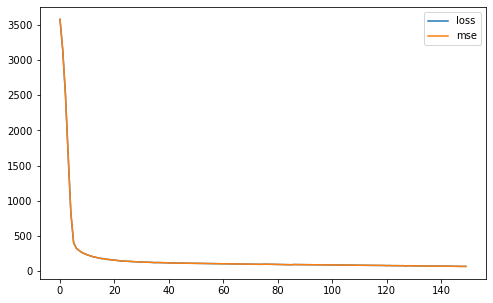

In [102]:
pd.DataFrame(history_some.history).plot(figsize=(8,5))

In [103]:
y_train_p_some = model_some.predict(x_train_some)
y_test_p_some = model_some.predict(x_test_some)

for t,p in zip(y_train,y_train_p):
    print(t,p)

for t,p in zip(y_test,y_test_p):
    print(t,p)

In [104]:
y_train_list_some=np.array(y_train_some).flatten().tolist() #y_train_some 리스트
y_test_list_some=np.array(y_test_some).flatten().tolist() #y_test_some 리스트
y_p_train_list_some=np.array(y_train_p_some).flatten().tolist() #y_train_some 예측 리스트
y_p_test_list_some=np.array(y_test_p_some).flatten().tolist() #y_test_some 예측 리스트

#오차 범위 3 설정
scores = 0
for i in range(len(y_train)):
    if  y_train_list[i]-3 <= y_p_train_list[i] <= y_train_list[i]+3:
        scores+=1

accuracy=scores/len(y_train)
print("- train set prediction accuracy(+-3): {:.2f} %".format(accuracy*100)) # 예측 정확도


scores = 0
for i in range(len(y_test)):
    if  y_test_list[i]-3 <= y_p_test_list[i] <= y_test_list[i]+3:
        scores+=1

accuracy=scores/len(y_test)
print("- test set prediction accuracy(+-3): {:.2f} %".format(accuracy*100)) # 예측 정확도

#======================================================================================


#오차 범위 5 설정
scores = 0
for i in range(len(y_train)):
    if  y_train_list[i]-5 <= y_p_train_list[i] <= y_train_list[i]+5:
        scores+=1

accuracy=scores/len(y_train)
print("- train set prediction accuracy(+-5): {:.2f} %".format(accuracy*100)) # 예측 정확도


scores = 0
for i in range(len(y_test)):
    if  y_test_list[i]-5 <= y_p_test_list[i] <= y_test_list[i]+5:
        scores+=1

accuracy=scores/len(y_test)
print("- test set prediction accuracy(+-5): {:.2f} %".format(accuracy*100)) # 예측 정확도

#======================================================================================


#오차 범위 10 설정
scores = 0
for i in range(len(y_train)):
    if  y_train_list[i]-10 <= y_p_train_list[i] <= y_train_list[i]+10:
        scores+=1

accuracy=scores/len(y_train)
print("- train set prediction accuracy(+-10): {:.2f} %".format(accuracy*100)) # 예측 정확도


scores = 0
for i in range(len(y_test)):
    if  y_test_list[i]-10 <= y_p_test_list[i] <= y_test_list[i]+10:
        scores+=1

accuracy=scores/len(y_test)
print("- test set prediction accuracy(+-10): {:.2f} %".format(accuracy*100)) # 예측 정확도


#======================================================================================


#오차 범위 20 설정
scores = 0
for i in range(len(y_train)):
    if  y_train_list[i]-20 <= y_p_train_list[i] <= y_train_list[i]+20:
        scores+=1

accuracy=scores/len(y_train)
print("- train set prediction accuracy(+-20): {:.2f} %".format(accuracy*100)) # 예측 정확도


scores = 0
for i in range(len(y_test)):
    if  y_test_list[i]-20 <= y_p_test_list[i] <= y_test_list[i]+20:
        scores+=1

accuracy=scores/len(y_test)
print("- test set prediction accuracy(+-20): {:.2f} %".format(accuracy*100)) # 예측 정확도

In [105]:
#평균 성능 테스트
scores = 0
mean=np.mean(Y, axis=0)
for i in range(len(y_train_some)):
    if  y_train_list_some[i]-10 <= mean <= y_train_list_some[i]+10:
        scores+=1

accuracy=scores/len(y_train_some)
print("train_some set prediction accuracy: {:.2f} %".format(accuracy*100)) # 예측 정확도

#======================================================================================

scores = 0
for i in range(len(y_test_some)):
    if  y_test_list_some[i]-10 <= mean <= y_test_list_some[i]+10:
        scores+=1

accuracy=scores/len(y_test_some)
print("test_some set prediction accuracy: {:.2f} %".format(accuracy*100)) # 예측 정확도

train_some set prediction accuracy: 50.35 %
test_some set prediction accuracy: 56.94 %


In [106]:
######입력용#######

#오차 범위 3 설정
print('### <오차범위 3>')
scores = 0
for i in range(len(y_train_some)):
    if  y_train_list_some[i]-3 <= y_p_train_list_some[i] <= y_train_list_some[i]+3:
        scores+=1

accuracy=scores/len(y_train_some)
print("- train_some set prediction accuracy(+-3): {:.2f} % <br>".format(accuracy*100)) # 예측 정확도


scores = 0
for i in range(len(y_test_some)):
    if  y_test_list_some[i]-3 <= y_p_test_list_some[i] <= y_test_list_some[i]+3:
        scores+=1

accuracy=scores/len(y_test_some)
print("- test_some set prediction accuracy(+-3): {:.2f} % <br>".format(accuracy*100)) # 예측 정확도
print('<br>')
print()
#======================================================================================


#오차 범위 5 설정
print('### <오차범위 5>')
scores = 0
for i in range(len(y_train_some)):
    if  y_train_list_some[i]-5 <= y_p_train_list_some[i] <= y_train_list_some[i]+5:
        scores+=1

accuracy=scores/len(y_train_some)
print("- train_some set prediction accuracy(+-5): {:.2f} % <br>".format(accuracy*100)) # 예측 정확도


scores = 0
for i in range(len(y_test_some)):
    if  y_test_list_some[i]-5 <= y_p_test_list_some[i] <= y_test_list_some[i]+5:
        scores+=1

accuracy=scores/len(y_test_some)
print("- test_some set prediction accuracy(+-5): {:.2f} % <br>".format(accuracy*100)) # 예측 정확도
print('<br>')
print()
#======================================================================================


#오차 범위 10 설정
print('### <오차범위 10>')
scores = 0
for i in range(len(y_train_some)):
    if  y_train_list_some[i]-10 <= y_p_train_list_some[i] <= y_train_list_some[i]+10:
        scores+=1

accuracy=scores/len(y_train_some)
print("- train_some set prediction accuracy(+-10): {:.2f} % <br>".format(accuracy*100)) # 예측 정확도


scores = 0
for i in range(len(y_test_some)):
    if  y_test_list_some[i]-10 <= y_p_test_list_some[i] <= y_test_list_some[i]+10:
        scores+=1

accuracy=scores/len(y_test_some)
print("- test_some set prediction accuracy(+-10): {:.2f} % <br>".format(accuracy*100)) # 예측 정확도
print('<br>')
print()

### <오차범위 3>
- train_some set prediction accuracy(+-3): 32.99 % <br>
- test_some set prediction accuracy(+-3): 27.78 % <br>
<br>

### <오차범위 5>
- train_some set prediction accuracy(+-5): 54.86 % <br>
- test_some set prediction accuracy(+-5): 40.28 % <br>
<br>

### <오차범위 10>
- train_some set prediction accuracy(+-10): 82.29 % <br>
- test_some set prediction accuracy(+-10): 59.72 % <br>
<br>



# 다쓴거
### <오차범위 3>
- train_all set prediction accuracy(+-3): 88.89 % <br>
- test_all set prediction accuracy(+-3): 31.94 % <br>
<br>

### <오차범위 5>
- train_all set prediction accuracy(+-5): 96.53 % <br>
- test_all set prediction accuracy(+-5): 55.56 % <br>
<br>

### <오차범위 10>
- train_all set prediction accuracy(+-10): 100.00 % <br>
- test_all set prediction accuracy(+-10): 83.33 % <br>
<br>

# 다안쓴거
### <오차범위 3>
- train_some set prediction accuracy(+-3): 32.99 % <br>
- test_some set prediction accuracy(+-3): 27.78 % <br>
<br>

### <오차범위 5>
- train_some set prediction accuracy(+-5): 54.86 % <br>
- test_some set prediction accuracy(+-5): 40.28 % <br>
<br>

### <오차범위 10>
- train_some set prediction accuracy(+-10): 82.29 % <br>
- test_some set prediction accuracy(+-10): 59.72 % <br>
<br>